In [1]:
#USING A CUSTOM LIBRARY
include("ODE.jl")
using .ODE, Plots, Statistics

## PC-Exercise 8.1.1

In [2]:
#PC-Exercise 8.1.1
x8_1_1(t) = exp(-5t);
a8_1_1(x,t) = -5x;

In [3]:
nb8_1_1_a = NumericalBase(a8_1_1,2^-3);
nb8_1_1_b = NumericalBase(a8_1_1,2^-5);

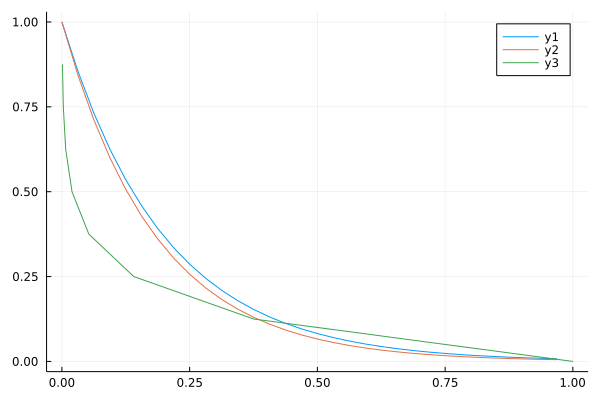

In [4]:
p = plot(0.0:nb8_1_1_b.Δt:0.99, [[x8_1_1(t) for t=0.0:nb8_1_1_b.Δt:0.99],euler_method(nb8_1_1_b, 1.0,0.0,1.0)])
plot!(p,euler_method(nb8_1_1_a, 1.0,0.0,1.0),0.0:nb8_1_1_a.Δt:0.99)

## PC-Exercise 8.1.2

In [5]:
#8_1_2: make a list of numerical bases
bases = [NumericalBase(a8_1_1,2.0^-i) for i = 0:13];

In [6]:
#calculate global discretization error

## PC-Exercise 8.1.3
Repeat PC-Exercise 8.1.2 using Heun's method. Compare results with eulers method.

## PC-Exercise 8.1.5
Repeat PC-Exercise 8.1.3 using the 3-step Adams-Bashford Method with the Heun method as its starting routine.

## PC-Exercise 8.1.7
Compare the error of the Euler and Richardson/Romberg extrapolation approximations of X(1) for the solution of the initial value problem
$$
\frac{\partial x}{\partial t} = -x, x(0)=1
$$
for equal time steps $\Delta = 2^{-3}, \dots, 2^{-10}$.
Plot $\log_2$ of the errors against $\log_2 \Delta$.

## PC-Exercise 8.2.1
Use the 2nd Order truncated taylor method with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-10}$
to calculate approximations to the solution:
$$
    x(t)
$$
of the initial value problem
$$
$$
over the interval $0\leq t \leq 0.5$
Repeat the calculations using the 3rd order truncated taylor method.
Plot $\log_2$ of the global discretiation errors against $\log_2 \Delta$.

## PC-Exercise 8.2.2
Repeat PC-Exercise 8.2.1 using the 4th order Runge-Kutta method with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-7}$

## PC-Exercise 8.2.3

## PC-Exercise 8.4.1
Calculate 300 iterates of
$$
$$
with initial value $y_0 = 0.1$ using the prescribed arithematic of the PC, 
at each step rounding the value of $Y_{n+1}$ to the first 4 significant figures.
Plot the relative frequencies of the roundoff errors in a histogram on 
using 40 equal bins.

In [7]:
function iter8_4_2(yn::Float64)
    return π/3 * yn
end

iter8_4_2 (generic function with 1 method)

In [8]:
y = 0.1
N8_4_1 = 300
rounding_errors = zeros(N8_4_1)

for i in 2:N8_4_1
    yi = iter8_4_2(y)
    rounding_errors[i] = yi - round(yi, digits=4)
    y = yi
end

In [9]:
mean(rounding_errors),std(rounding_errors)#,max(rounding_errors),min(rounding_errors)

(1.3419618906535906e-6, 2.816802960951247e-5)

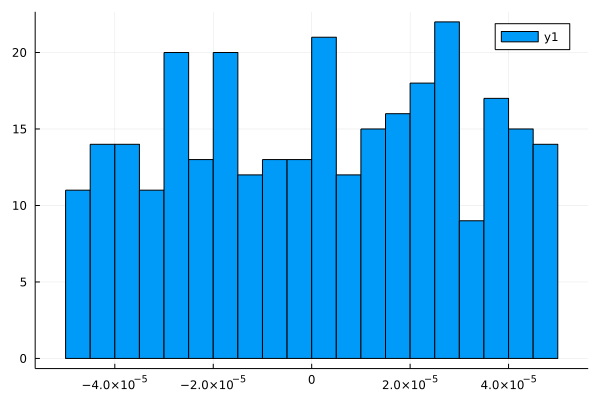

In [10]:
histogram(rounding_errors,bins=40)

## PC-Exercise 8.4.2
Use the Euler method with equal length time steps $\Delta = 2^{-2}$ for the differential equation 
$$
\partial x = x \partial t
$$
over the interval $0 \leq t \leq 1$ for 1,000 different initial values $x(0) \in [0.4,0.6]$.

Use both the prescribed arithematic and round to 4 decimal places to determine the final 
accumulative roundoff error in each case,
plotting the roundoff error in a histogram with 40 equal subintervals.
In addition, calculate the sample mean and sample variance.

In [11]:
#record the known solution and get the differential version.
f8_4_2(x,t) = exp(x);
f8_4_2′(x,t) = x;

N8_4_2 = 1000

nb8_4_2 = NumericalBase(f8_4_2,2^-2);
x0 = (2*rand(N8_4_2).+4.0)/10;
R = zeros(N8_4_2);

In [12]:
function record8_4(nb::NumericalBase,x0,N)
    for i in 1:N
        yi = euler_method(nb,x0[i],0.0,1.0)[4]
        R[i] = yi - round(yi, digits=4)
    end
    
    return R,mean(R),std(R)
end

record8_4 (generic function with 1 method)

Mean: 8.500402946682861e-7
stdev: 2.813502947284347e-5


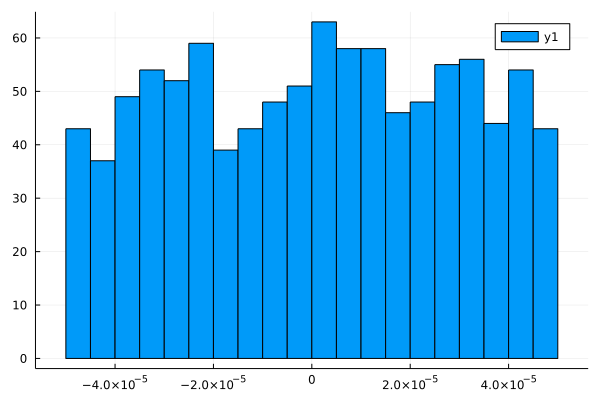

In [13]:
err_x,mean_x,std_x = record8_4(nb8_4_2,x0,N8_4_2)
println("Mean: ",mean_x,"\n","stdev: ", std_x)

histogram(R,bins=40)

## PC-Exercise 8.4.3
Repeat PC-Exercise 8.4.2 with N = 200 and with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-5}$
, determine the roundoff error in each case. plot the 90% confidence intervales for the mean value of the error against $\Delta$.

In [14]:
nb8_4_3_a = NumericalBase(f8_4_2,2^-3);
nb8_4_3_b = NumericalBase(f8_4_2,2^-4);
nb8_4_3_c = NumericalBase(f8_4_2,2^-5);

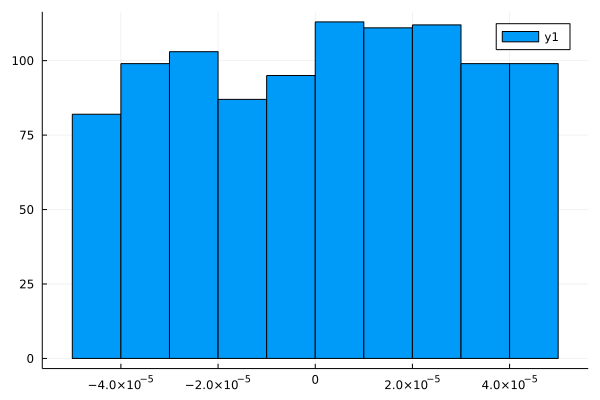

In [15]:
err_a,mean_a,std_a = record8_4(nb8_4_3_a,x0,200);
histogram(err_a)

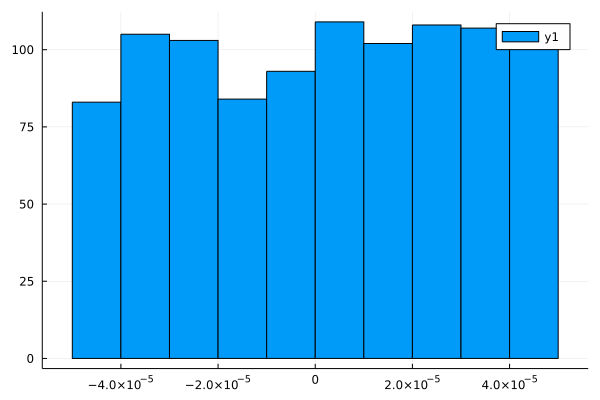

In [16]:
err_b,mean_b,std_b = record8_4(nb8_4_3_b,x0,200);
histogram(err_b)

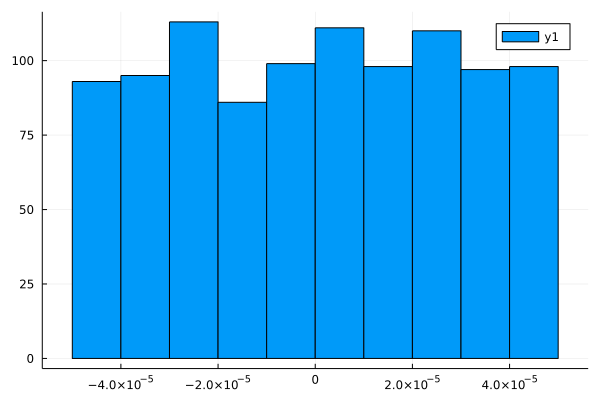

In [17]:
err_c,mean_c,std_c = record8_4(nb8_4_3_c,x0,200);
histogram(err_c)

In [22]:
v = [-1 1]
#90% confidence intervals #TODO
bounds_a = 1.65*std_a *v .+ mean_a;
bounds_b = 1.65*std_b *v .+ mean_b;
bounds_c = 1.65*std_c *v .+ mean_c;

In [23]:
bounds_a,bounds_b,bounds_c

([-4.4957559258205945e-5 4.782590553951922e-5], [-4.578866477901767e-5 4.9093715033839646e-5], [-4.649857126970931e-5 4.757738127135875e-5])

In [ ]:
#Plot